# various operation for image

### mean

In [6]:
import os
from nilearn.image import mean_img

img1 = r'/mnt/workdir/DCM/tmp/2022.4.11/Park_ROI_align_result/test_set/EC/testset1/group_6fold/hp/2ndLevel/_contrast_id_ZT_0001/con_0001.nii'
img2 = r'/mnt/workdir/DCM/tmp/2022.4.11/Park_ROI_align_result/test_set/EC/testset2/group_6fold/hp/2ndLevel/_contrast_id_ZT_0001/con_0001.nii'
new_img = mean_img([img1,img2])

savedir = r'/mnt/workdir/DCM/tmp/2022.4.11/Park_ROI_align_result/test_set/EC/6fold/hp'
if not os.path.exists(savedir):
    os.makedirs(savedir)

savepath = os.path.join(savedir,'mean_betas_align_EC_Phi.nii')
new_img.to_filename(savepath)

In [11]:
import os
import pandas as pd
from nilearn.image import load_img,mean_img
from nilearn.glm.second_level import SecondLevelModel
cmaps = []
cmap_dir1 = r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/game1/alignPhi/EC_group/Set1/6fold'
cmap_dir2 = r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/game1/alignPhi/EC_group/Set2/6fold'
#
participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
participants_data = pd.read_csv(participants_tsv,sep='\t')
data = participants_data.query('game1_fmri==1')  # look out
data = data.query('game1_acc>=0.80')
pid = data['Participant_ID'].to_list()
subjects = [p.replace('_','-') for p in pid]

for sub in subjects:
    img1 = load_img(os.path.join(cmap_dir1,sub,'ZT_0003.nii'))
    img2 = load_img(os.path.join(cmap_dir2,sub,'ZT_0003.nii'))
    mimg = mean_img([img1,img2])
    cmaps.append(mimg)

design_matrix = pd.DataFrame([1] * len(cmaps), columns=['intercept'])

second_level_model = SecondLevelModel()
second_level_model = second_level_model.fit(cmaps,
                                            design_matrix=design_matrix)
import os
out_img = second_level_model.compute_contrast(second_level_stat_type='t',output_type='all')
savedir = r'/mnt/workdir/DCM/BIDS/derivatives/Nipype/game1/alignPhi/EC_group/group/6fold/hp/'
if not os.path.exists(savedir):
    os.makedirs(savedir)

cmap = out_img['effect_size']
tmap = out_img['stat']
zmap = out_img['z_score']
pmap = out_img['p_value']

cmap.to_filename(os.path.join(savedir,'cmap_align_EC_Phi.nii'))
tmap.to_filename(os.path.join(savedir,'tmap_align_EC_Phi.nii'))
zmap.to_filename(os.path.join(savedir,'zmap_align_EC_Phi.nii'))
pmap.to_filename(os.path.join(savedir,'pmap_align_EC_Phi.nii'))

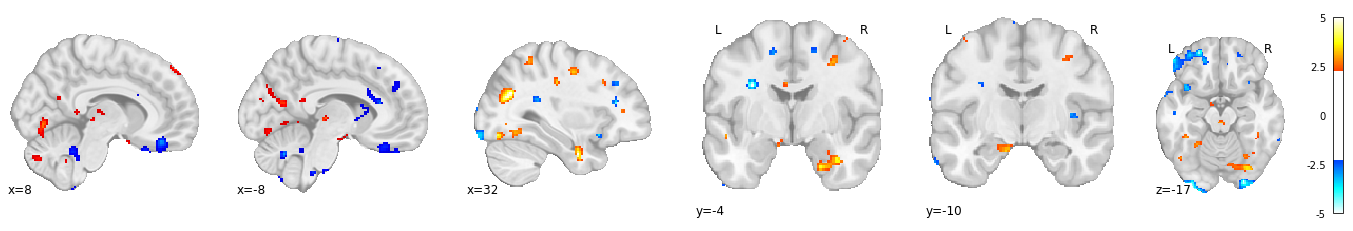

In [12]:
from nilearn.plotting import plot_stat_map
from nilearn.image import load_img
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,6,figsize=[24,4])
stat_map = load_img(os.path.join(savedir,'tmap_align_EC_Phi.nii'))

bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')
#bg_img = load_img(r'/mnt/data/Template/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')
#stat_map = math_img("np.where(img<0,0,img)",img=stat_map)

plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[8],threshold=2.3,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[0],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-8],threshold=2.3,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[1],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[32],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='x',black_bg=0,figure=fig,
              axes=ax[2],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-4],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[3],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-10],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='y',black_bg=0,figure=fig,
              axes=ax[4],colorbar=False)
plot_stat_map(stat_map_img=stat_map,bg_img=bg_img,cut_coords=[-17],threshold=2.3,vmax=5,symmetric_cbar=1,display_mode='z',black_bg=0,figure=fig,
              axes=ax[5],colorbar=True)